In [ ]:
!pip install gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 52.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression

import re
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the NLTK tokenizer data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## assignments:

- logistic regression - ehab

- word2vec/clustering - carol

- random forest - Nikki

- naive bayes - kathy

- neural networks - gelo 

# Loading Dataset

In [ ]:
spotify_df = pd.read_csv("/work/spotify_songs[1].csv")
spotify_df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# Data Cleaning + Feature Engineering

## Deciding a cutoff for what is considered "popular" vs. "not popular" and removing all songs with zero popularity

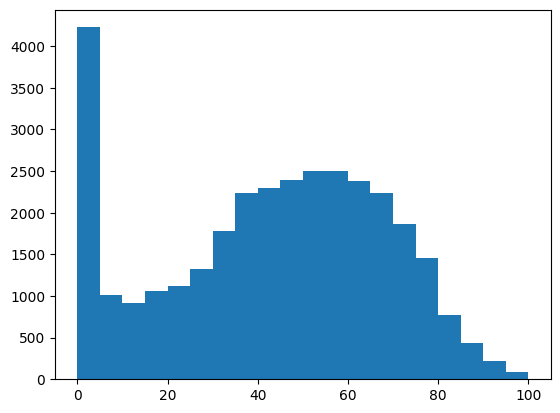

In [ ]:
plt.hist(spotify_df['track_popularity'], bins=20)
spotify_df = spotify_df[spotify_df['track_popularity'] != 0]
spotify_df['popular'] = spotify_df['track_popularity'] > 50

In [ ]:
len(spotify_df[spotify_df['track_popularity'] > 50])/len(spotify_df)

0.4633919681380684

## Grouping so that granularity is unique songs 

In [ ]:
spotify_df = spotify_df.groupby('track_album_id').first()
spotify_df

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popular
track_album_id,,,,,,,,,,,,,,,,,,,,,
000YOrgQoB5IiiH95Yb8vY,1N7LOfeXaVkCzRSSUNW6W2,The Road,Shahmen,43,The Road,2019-03-08,Rap Party 24/7 Radio / Gangsta Rap,4sGnz2x5tbHE2YlW1nemfb,rap,gangster rap,...,-7.536,0,0.4500,0.000624,0.000000,0.0953,0.231,89.985,154897,False
000f3dTtvpazVzv35NuZmn,4hu0hZxoEAgGnf1wgpEax8,Bargain,Rob,31,"Make It Fast, Make It Slow (Soundway Records)",2012-03-12,Afro Psychedelica,37i9dQZF1DWVyizF9BJ61m,rock,classic rock,...,-10.883,0,0.4230,0.515000,0.304000,0.1270,0.416,103.967,317685,False
003sFH4G9RLE253AFIJ0YJ,5ahvjrjn7ymaeaWKFZrsca,The Sun - Klingande Remix Radio Edit,Parov Stelar,56,The Sun (Klingande Remix),2015,Tropical House,37i9dQZF1DX0AMssoUKCz7,latin,tropical,...,-6.783,0,0.3070,0.093500,0.355000,0.1460,0.460,124.928,210376,True
006AgHXrEw13oyg0D8evRa,7o7rrKyfqGo5xw318JNFUb,Only You (feat. Notorious B.I.G. and Mase) - G...,112,44,Bad Boy Greatest Hits Vol. 1,1998,90s Gangsta Rap / Top Hip-hop Classics,0C2zyPdlkbWHrwVg9gqNdU,rap,gangster rap,...,-6.392,1,0.0508,0.016200,0.000000,0.0569,0.779,95.952,290040,False
006Wgzj2wMz9BX5aPYqjTr,2SLEZrKKVNpOXQJN8UKSxC,Pressure - Valentino Khan Remix,RL Grime,48,"NOVA (The Remixes, Vol. 2)",2018-12-14,Nasty Bits,37i9dQZF1DX2VvACCrgjrt,edm,electro house,...,-0.439,1,0.1740,0.000587,0.284000,0.0723,0.169,126.012,203810,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zqtWpFCoJQYOzbojgpppK,2FfH72VskV7KXasFtOWJs7,Won't Come Home,Mennska,33,Won't Come Home,2015-12-17,Tropical Beats,37i9dQZF1DX1bDvyV0IkZ3,latin,tropical,...,-7.140,0,0.1020,0.131000,0.000437,0.1080,0.127,97.068,303619,False
7zv7jR5XwHGhuPpA2RfgDN,4VjCZgSxCQOKw0XM2NpK5q,Deserter,Crystal Tides,18,Deserter,2019-11-22,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,permanent wave,...,-6.177,1,0.0390,0.236000,0.000000,0.0280,0.666,132.976,190000,False
7zwFXsoksUlQQwO7pF9DGg,4bC3PgzOLeqOfluhN3nMpf,Musica che resta,Il Volo,47,Musica che resta,2019-02-06,Musica Italiana 2020 - Playlist Pop & Hip-Hop ...,6kVFIQBhLT4003iw2WWEv1,r&b,hip pop,...,-3.429,0,0.0538,0.130000,0.000000,0.1560,0.381,143.988,196601,False


## Manipulating the release date column and duration_ms column

In [ ]:
spotify_df['release_year'] = spotify_df['track_album_release_date'].apply(lambda x: int(x[0:4]))
spotify_df['release_month'] = spotify_df['track_album_release_date'].apply(lambda x: int(x[5:7]) if (len(x) > 4) else None)
spotify_df['release_month'] = spotify_df['release_month'].fillna(0)

# One-Hot-Encoding Playlist Genre

In [ ]:
playlist_genre_dummies = pd.get_dummies(spotify_df['playlist_genre'], prefix='genre')
spotify_df = pd.concat([spotify_df, playlist_genre_dummies], axis=1)
spotify_df

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,duration_ms,popular,release_year,release_month,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock
track_album_id,,,,,,,,,,,,,,,,,,,,,
000YOrgQoB5IiiH95Yb8vY,1N7LOfeXaVkCzRSSUNW6W2,The Road,Shahmen,43,The Road,2019-03-08,Rap Party 24/7 Radio / Gangsta Rap,4sGnz2x5tbHE2YlW1nemfb,rap,gangster rap,...,154897,False,2019,3.0,0,0,0,0,1,0
000f3dTtvpazVzv35NuZmn,4hu0hZxoEAgGnf1wgpEax8,Bargain,Rob,31,"Make It Fast, Make It Slow (Soundway Records)",2012-03-12,Afro Psychedelica,37i9dQZF1DWVyizF9BJ61m,rock,classic rock,...,317685,False,2012,3.0,0,0,0,0,0,1
003sFH4G9RLE253AFIJ0YJ,5ahvjrjn7ymaeaWKFZrsca,The Sun - Klingande Remix Radio Edit,Parov Stelar,56,The Sun (Klingande Remix),2015,Tropical House,37i9dQZF1DX0AMssoUKCz7,latin,tropical,...,210376,True,2015,0.0,0,1,0,0,0,0
006AgHXrEw13oyg0D8evRa,7o7rrKyfqGo5xw318JNFUb,Only You (feat. Notorious B.I.G. and Mase) - G...,112,44,Bad Boy Greatest Hits Vol. 1,1998,90s Gangsta Rap / Top Hip-hop Classics,0C2zyPdlkbWHrwVg9gqNdU,rap,gangster rap,...,290040,False,1998,0.0,0,0,0,0,1,0
006Wgzj2wMz9BX5aPYqjTr,2SLEZrKKVNpOXQJN8UKSxC,Pressure - Valentino Khan Remix,RL Grime,48,"NOVA (The Remixes, Vol. 2)",2018-12-14,Nasty Bits,37i9dQZF1DX2VvACCrgjrt,edm,electro house,...,203810,False,2018,12.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zqtWpFCoJQYOzbojgpppK,2FfH72VskV7KXasFtOWJs7,Won't Come Home,Mennska,33,Won't Come Home,2015-12-17,Tropical Beats,37i9dQZF1DX1bDvyV0IkZ3,latin,tropical,...,303619,False,2015,12.0,0,1,0,0,0,0
7zv7jR5XwHGhuPpA2RfgDN,4VjCZgSxCQOKw0XM2NpK5q,Deserter,Crystal Tides,18,Deserter,2019-11-22,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,permanent wave,...,190000,False,2019,11.0,0,0,0,0,0,1
7zwFXsoksUlQQwO7pF9DGg,4bC3PgzOLeqOfluhN3nMpf,Musica che resta,Il Volo,47,Musica che resta,2019-02-06,Musica Italiana 2020 - Playlist Pop & Hip-Hop ...,6kVFIQBhLT4003iw2WWEv1,r&b,hip pop,...,196601,False,2019,2.0,0,0,0,1,0,0


## Filtering out columns 

In [ ]:
# helpful columns for modelling- ['playlist_genre', 'track_album_release_date', 'danceability', 'mode', 'duration_ms', 'popular'] 
spotify_df = spotify_df.drop(["track_id","playlist_id", "playlist_subgenre", 'duration_ms'], axis=1)

## Feature selection

In [ ]:
df = spotify_df.corr()
correlation_df = df.iloc[0, :]
abs_correlations =  abs(correlation_df)
sorted_correlations = abs_correlations.sort_values(ascending = False)

correlation_df 

import seaborn as sns

top_features = sorted_correlations[2:18].index
top_features 

Index(['genre_edm', 'instrumentalness', 'genre_pop', 'energy', 'acousticness',
       'genre_rap', 'valence', 'genre_r&b', 'release_month', 'danceability',
       'loudness', 'liveness', 'genre_latin', 'speechiness', 'mode',
       'genre_rock'],
      dtype='object')

## Baseline Model

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


spotify_df['Dummy'] = False
preds = spotify_df['Dummy']
popular = spotify_df['popular']

print(accuracy_score(popular, preds))
print(f1_score(popular, preds, average="weighted"))
print(balanced_accuracy_score(popular, preds))

0.5957436517533252
0.44482144511673777
0.5


## Word2vec & Clustering

In [ ]:
names_only = list(spotify_df["track_name"])

song_titles = []
for x in names_only:
    clean = re.sub(r'[^a-zA-Z ]+', '', str(x))
    song_titles.append(clean)

tokenized_titles = [word_tokenize(title.lower()) for title in song_titles]

In [ ]:
# Define Word2Vec model (Skip-gram example)
model = Word2Vec(sentences=tokenized_titles, vector_size=100, window=5, sg=1, min_count=1)

# Training the Word2Vec model
model.train(tokenized_titles, total_examples=len(tokenized_titles), epochs=10)

# Save the trained model to a file
# model.save("song_title_word2vec_model.bin")

# To load the model later
# model = Word2Vec.load("song_title_word2vec_model.bin")

(533944, 629940)

In [ ]:
from itertools import chain

all_words = list(chain.from_iterable(tokenized_titles))
print(all_words)

['the', 'road', 'bargain', 'the', 'sun', 'klingande', 'remix', 'radio', 'edit', 'only', 'you', 'feat', 'notorious', 'big', 'and', 'mase', 'greatest', 'hits', 'version', 'pressure', 'valentino', 'khan', 'remix', 'bratva', 'iv', 'hololo', 'let', 'me', 'down', 'different', 'place', 'a', 'lot', 'into', 'the', 'wild', 'tan', 'buena', 'original', 'from', 'dolittle', 'aquaman', 'young', 'and', 'beautiful', 'lana', 'del', 'rey', 'vs', 'cedric', 'gervais', 'cedric', 'gervais', 'remix', 'radio', 'edit', 'tremor', 'sensation', 'anthem', 'radio', 'edit', 'me', 'sacaste', 'del', 'llavero', 'money', 'in', 'the', 'grave', 'drake', 'ft', 'rick', 'ross', 'swish', 'treat', 'you', 'better', 'ashworth', 'remix', 'my', 'love', 'is', 'your', 'love', 'my', 'temperature', 'is', 'rising', 'bring', 'it', 'to', 'me', 'kung', 'fu', 'brass', 'dont', 'start', 'now', 'kungs', 'remix', 'journey', 'radio', 'mix', 'fiya', 'prototype', 'retrograde', 'fantasy', 'girl', 'a', 'long', 'walk', 'remastered', 'knockin', 'on', 

In [ ]:
model.wv.similarity("beautiful", "people")

0.9545053

In [ ]:
model.wv.most_similar("beautiful")

[('share', 0.9710813760757446),
 ('child', 0.9682326316833496),
 ('james', 0.9681704044342041),
 ('sing', 0.9661437273025513),
 ('find', 0.9635526537895203),
 ('thang', 0.9602757692337036),
 ('cat', 0.9599553346633911),
 ('falling', 0.9596971273422241),
 ('watch', 0.95945143699646),
 ('holdin', 0.9584761261940002)]

In [ ]:
from itertools import chain

all_words = list(chain.from_iterable(tokenized_titles))
print(all_words[:20])

['the', 'road', 'bargain', 'the', 'sun', 'klingande', 'remix', 'radio', 'edit', 'only', 'you', 'feat', 'notorious', 'big', 'and', 'mase', 'greatest', 'hits', 'version', 'pressure']


In [ ]:
word_vec = {}
for x in all_words: 
    word_vec[x] = model.wv[x]

word_vec

{'the': array([-0.11977368,  0.44217232, -0.08805872,  0.5038316 ,  0.2991399 ,
        -0.750493  ,  0.11887619,  0.6487368 , -0.57017845, -0.5607005 ,
         0.2780316 , -0.19779886, -0.20904735,  0.30644614, -0.01561681,
        -0.13168274,  0.25701526,  0.19884244, -0.42755878, -0.963677  ,
         0.2036007 , -0.09290663,  0.5127868 , -0.52606875,  0.17736757,
         0.43541133, -0.37695363, -0.1784823 , -0.20866896,  0.61726534,
         0.30823025, -0.26752877,  0.45792863, -0.87650585,  0.01388204,
         0.66436785,  0.22275467,  0.14852156,  0.03482901, -0.10889616,
         0.01344225, -0.5842788 , -0.14529175,  0.5606786 ,  0.25132194,
         0.02840359, -0.02248136, -0.5887612 , -0.05172367,  0.37190598,
         0.33661968, -0.37319508, -0.4042151 ,  0.07765181, -0.28241572,
         0.2529215 , -0.1387724 ,  0.10750981, -0.3073831 ,  0.45609185,
        -0.2140812 ,  0.43875402,  0.2863691 , -0.11096524, -0.24831562,
         0.762079  ,  0.2502649 ,  0.2915516

In [ ]:
len(model.wv)

12279

## Clustering

In [ ]:
p = list(word_vec.values())
len(p)

12279

In [ ]:
#  top 10 most representative words/phrases of each cluster

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(p)
ones_top = model.wv.similar_by_vector(kmeans.cluster_centers_[0], topn=10)
zeros_top = model.wv.similar_by_vector(kmeans.cluster_centers_[1], topn=10)

[x[0] for x in ones_top]
[x[0] for x in zeros_top]

most_rep_cluster1 = [x[0] for x in ones_top]
most_rep_cluster2 = [x[0] for x in zeros_top]

print(most_rep_cluster1)
print(most_rep_cluster2)

['mel', 'yung', 'signal', 'nafe', 'planet', 'goulding', 'polima', 'moonkey', 'waldo', 'senza']
['talking', 'edm', 'animal', 'sold', 'wilson', 'kissing', 'keys', 'ending', 'legends', 'tide']


In [ ]:
kmeans.cluster_centers_

array([[-1.05098058e-02,  6.65251517e-02,  9.99398250e-03,
         2.61237879e-02,  4.48760408e-03, -5.68573904e-02,
        -9.88743353e-03,  9.38174863e-02, -5.90435173e-02,
        -4.11365299e-02, -1.67258876e-02, -7.09322415e-02,
         7.63562052e-04,  4.82815930e-02,  3.28058780e-02,
        -4.31466408e-02,  2.41340808e-02, -4.26290699e-02,
         1.23920964e-03, -9.96612134e-02,  4.39932658e-02,
         9.42780384e-03,  1.23010907e-02, -4.33480935e-02,
         7.35447596e-03,  1.03832157e-02, -3.39500086e-02,
         1.58179871e-03, -3.41642064e-02,  5.16822105e-03,
         3.42570124e-02, -2.23874441e-02,  1.14477151e-02,
        -7.10605755e-02, -8.20087635e-03,  4.40115637e-02,
         1.64283507e-02, -1.11841947e-02, -3.35111937e-02,
        -5.52542026e-02, -4.22352154e-03, -3.78363735e-02,
        -3.65444041e-02,  1.60876332e-02,  3.00425551e-02,
        -5.71150170e-02, -3.82957742e-02,  2.66133750e-03,
         4.03772937e-02,  4.02596611e-02,  1.41032709e-0

In [ ]:
from sklearn.metrics import silhouette_score

# finding the silhouette score for x clulsters, and appending them to k_silhouette_scores
k_silhouette_scores = {}
for x in range(2, 9):
    KMean= KMeans(n_clusters=x, n_init = 10, random_state= 42)
    KMean.fit(p)
    label=KMean.predict(p)
    k_silhouette_scores[x] = silhouette_score(p, label)


In [ ]:
k_silhouette_scores

{2: 0.65238696,
 3: 0.5519045,
 4: 0.42663056,
 5: 0.42661172,
 6: 0.38786218,
 7: 0.37539417,
 8: 0.34738854}

In [ ]:
KMean.cluster_centers_

array([[-2.51693734e-03,  1.62576094e-02,  3.04745317e-03,
         6.80780440e-03,  1.19777977e-03, -1.40102376e-02,
        -2.90532840e-03,  2.32062319e-02, -1.44768154e-02,
        -1.04464832e-02, -4.21316565e-03, -1.75868269e-02,
        -1.71704290e-04,  1.22104200e-02,  8.34278352e-03,
        -1.00714733e-02,  5.70839474e-03, -1.06854110e-02,
         6.19807465e-04, -2.47715063e-02,  1.09884650e-02,
         2.31501970e-03,  2.77434304e-03, -1.09824650e-02,
         1.92756703e-03,  2.62169706e-03, -8.51916528e-03,
         8.14101821e-04, -8.45321898e-03,  9.24623517e-04,
         8.49092431e-03, -5.66713834e-03,  2.53729668e-03,
        -1.74051360e-02, -1.89047435e-03,  1.05311282e-02,
         4.25400108e-03, -2.69091773e-03, -8.46320376e-03,
        -1.35254305e-02, -8.53089466e-04, -9.80457648e-03,
        -9.39460915e-03,  4.26672452e-03,  7.49206240e-03,
        -1.44629778e-02, -9.97736251e-03,  1.01136062e-03,
         1.01311315e-02,  1.02302522e-02,  3.34029239e-0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Convert the data and labels to a DataFrame

df = pd.DataFrame({'col1': p})

df['Cluster'] = labels

# Plot the original data points with colors representing clusters
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

NameError: name 'labels' is not defined

## Neural Networks

In [ ]:
spotify_df.head(20)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,danceability,energy,key,...,popular,release_year,release_month,genre_edm,genre_latin,genre_pop,genre_r&b,genre_rap,genre_rock,Dummy
track_album_id,,,,,,,,,,,,,,,,,,,,,
000YOrgQoB5IiiH95Yb8vY,The Road,Shahmen,43,The Road,2019-03-08,Rap Party 24/7 Radio / Gangsta Rap,rap,0.759,0.660,4,...,False,2019,3.0,0,0,0,0,1,0,False
000f3dTtvpazVzv35NuZmn,Bargain,Rob,31,"Make It Fast, Make It Slow (Soundway Records)",2012-03-12,Afro Psychedelica,rock,0.811,0.561,5,...,False,2012,3.0,0,0,0,0,0,1,False
003sFH4G9RLE253AFIJ0YJ,The Sun - Klingande Remix Radio Edit,Parov Stelar,56,The Sun (Klingande Remix),2015,Tropical House,latin,0.612,0.761,11,...,True,2015,0.0,0,1,0,0,0,0,False
006AgHXrEw13oyg0D8evRa,Only You (feat. Notorious B.I.G. and Mase) - G...,112,44,Bad Boy Greatest Hits Vol. 1,1998,90s Gangsta Rap / Top Hip-hop Classics,rap,0.764,0.502,8,...,False,1998,0.0,0,0,0,0,1,0,False
006Wgzj2wMz9BX5aPYqjTr,Pressure - Valentino Khan Remix,RL Grime,48,"NOVA (The Remixes, Vol. 2)",2018-12-14,Nasty Bits,edm,0.674,0.907,2,...,False,2018,12.0,1,0,0,0,0,0,False
006qPzTTwYGb4t4glyTaLw,Bratva iv - Hololo,Tovaritch,42,Bratva iv - Hololo,2019-08-27,RUSSIAN Gangster Rap,rap,0.734,0.706,0,...,False,2019,8.0,0,0,0,0,1,0,False
006wfSK6TYpZIFU9yEzPEo,Let Me Down,Jorja Smith,8,Let Me Down,2018-01-12,urban CONTEMPORARY,r&b,0.547,0.504,5,...,False,2018,1.0,0,0,0,1,0,0,False
007354CLF8nvIbRN7Gwns9,Different Place,STVCKS,4,Different Place,2018-03-02,Pop Warmup 130 BPM,pop,0.673,0.943,10,...,False,2018,3.0,0,0,1,0,0,0,False
007DWn799UWvfY1wwZeENR,a lot,21 Savage,81,i am > i was,2018-12-21,Someone You Loved Lewis Capaldi (Pop Music Mix),pop,0.837,0.636,1,...,True,2018,12.0,0,0,1,0,0,0,False


In [ ]:
# Split dataset into training and testing 
y = np.asarray(spotify_df['popular'], dtype = "bool")

top_features = sorted_correlations[2:15].index
top_features

X_train, X_test, Y_train, Y_test = train_test_split(spotify_df[top_features].reset_index(drop=True), y, test_size = 0.3, random_state = 42, shuffle=True)

# Create NN
spotify_nn = MLPClassifier(hidden_layer_sizes=(10),
                            activation = 'relu',
                            max_iter = 200,
                            solver = 'lbfgs',
                            random_state = 42)

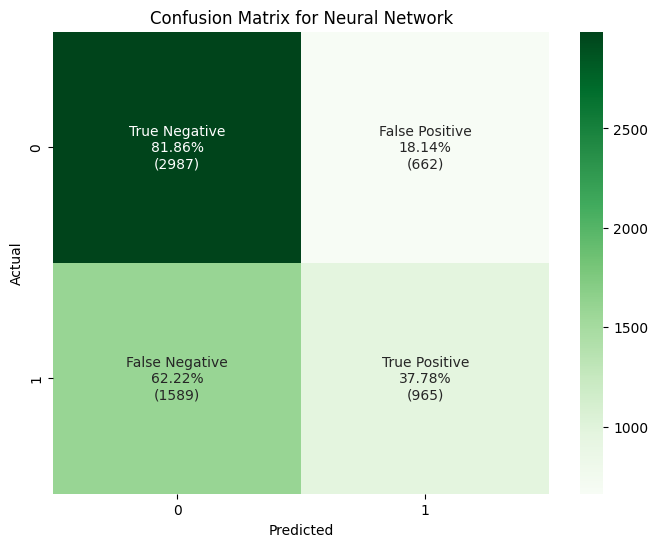

F1 Score for test set: 0.6568907217589446
Accuracy score for test set: 0.6371110752861519
Balanced accuracy score for test set: 0.5982095587059713
F1 Score for training set: 0.6599733693844436
Accuracy score for training set: 0.6405472636815921
Balanced accuracy score for training set: 0.5968339865223513


In [ ]:
# Fit the data
spotify_nn.fit(X_train, Y_train)

#Get predictions
preds = spotify_nn.predict(X_test)
train_preds = spotify_nn.predict(X_train)

cm_lg = confusion_matrix(Y_test, preds)

labels_lg = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
cm_sum = np.sum(cm_lg, axis=1, keepdims=True)
cm_perc = cm_lg / cm_sum.astype(float) * 100

annot = np.asarray([["{}\n{:.2f}%\n({})".format(text, data, count)
                     for text, data, count in zip(labels_lg.flatten(),
                                                   cm_perc.flatten(),
                                                   cm_lg.flatten())]]).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=annot, fmt='', cmap='Greens')
plt.title('Confusion Matrix for Neural Network')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import f1_score
print("F1 Score for test set:", f1_score(preds, Y_test, average="weighted"))
print("Accuracy score for test set:", accuracy_score(Y_test, preds))
print("Balanced accuracy score for test set:", balanced_accuracy_score(Y_test, preds))

print("F1 Score for training set:", f1_score(train_preds, Y_train, average="weighted"))
print("Accuracy score for training set:", accuracy_score(Y_train, train_preds))
print("Balanced accuracy score for training set:", balanced_accuracy_score(Y_train, train_preds))

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

y = np.asarray(spotify_df['popular'], dtype = "bool")

X_train, X_test, Y_train, Y_test = train_test_split(spotify_df[['mode', 'key', 'release_year', 'release_month']].reset_index(drop=True), y, test_size = 0.3, random_state = 42, shuffle=True)

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, Y_train)

# Predict Output
predicted = model.predict(X_test)
train_preds = model.predict(X_train)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, Y_test)
f1_test = f1_score(y_pred, Y_test, average="weighted")
f1_train = f1_score(train_preds, Y_train, average="weighted")

print("Accuracy:", accuracy)
print("Test F1 Score:", f1_test)
print("Train F1 Score:", f1_train)
print(balanced_accuracy_score(y_pred, Y_test))

Accuracy: 0.5926164758987587
Test F1 Score: 0.6750083734407536
Train F1 Score: 0.6809629149818038
0.5612267542106162


# Logistic Regression

In [ ]:
#revised version
# features_lg = ['danceability', 'energy', 'loudness', 
#             'speechiness', 'acousticness', 'instrumentalness', 
#             'liveness', 'valence', 'tempo', 'genre_edm', 'genre_latin', 'genre_pop']

top_features = sorted_correlations[2:18].index
features_lg = top_features
X_lg = spotify_df.loc[:, features_lg].reset_index(drop=True)
y_lg = np.asarray(spotify_df['popular'], dtype = "bool")

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, test_size=0.3, random_state=42, shuffle=True)

model_lg = LogisticRegression()
model_lg.fit(X_train_lg, y_train_lg)
y_pred_lg = model_lg.predict(X_test_lg)
y_pred_lg_train = model_lg.predict(X_train_lg)
print()

accuracy_lg = accuracy_score(y_test_lg, y_pred_lg)
print(f"Accuracy: {accuracy_lg}")
f1_lg = f1_score(y_pred_lg, y_test_lg, average="weighted")
f1_lg_train = f1_score(y_pred_lg_train, y_train_lg, average="weighted")
print("F1 Score", f1_lg)
print("F1 Score - Train",f1_lg_train)
balanced_acc_lg = balanced_accuracy_score(y_test_lg, y_pred_lg)
print(f"Balanced Accuracy Score: {balanced_acc_lg}")
cm_lg = confusion_matrix(y_test_lg, y_pred_lg)
cm_lg


Accuracy: 0.6295340964049654
F1 Score 0.6549322377291246
F1 Score - Train 0.6508976097958746
Balanced Accuracy Score: 0.5861884259168848


array([[3035,  614],
       [1684,  870]])

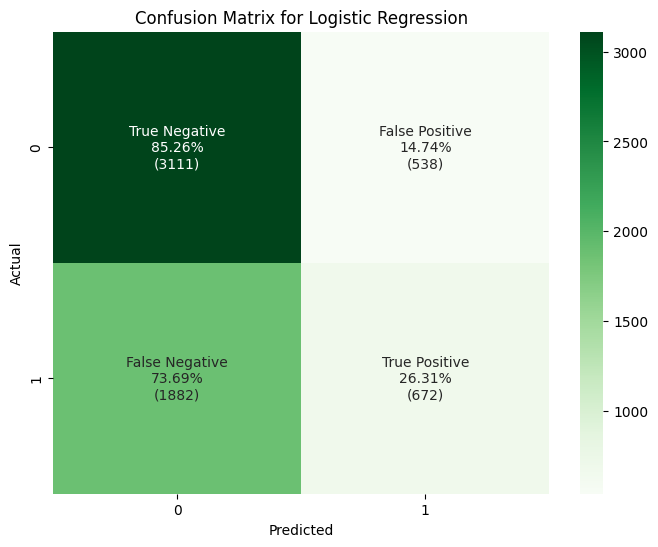

In [ ]:
labels_lg = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])
cm_lg = confusion_matrix(y_test_lg, y_pred_lg)
cm_sum = np.sum(cm_lg, axis=1, keepdims=True)
cm_perc = cm_lg / cm_sum.astype(float) * 100

annot = np.asarray([["{}\n{:.2f}%\n({})".format(text, data, count)
                     for text, data, count in zip(labels_lg.flatten(),
                                                   cm_perc.flatten(),
                                                   cm_lg.flatten())]]).reshape(2,2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lg, annot=annot, fmt='', cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

features_lg = ['danceability', 'energy', 'key', 'loudness', 'mode', 
            'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo',  'genre_edm', 'genre_latin', 'genre_pop', 
            'genre_r&b', 'genre_rap', 'genre_rock']

X_lg = spotify_df[features_lg]
y_lg = np.asarray(spotify_df['popular'], dtype = "|S6")

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, test_size=0.3, random_state=42)

model_lg = LogisticRegression()
model_lg.fit(X_train_lg, y_train_lg)
y_pred_lg = model_lg.predict(X_test_lg)
y_pred_lg_train = model_lg.predict(X_train_lg)
accuracy_lg = accuracy_score(y_test_lg, y_pred_lg)
print(f"Accuracy: {accuracy_lg}")
f1_lg = f1_score(y_pred_lg, y_test_lg, average="weighted")
f1_lg_train = f1_score(y_pred_lg_train, y_train_lg, average="weighted")
print("F1 Score", f1_lg)
print("F1 Score train", f1_lg_train)
balanced_acc_lg = balanced_accuracy_score(y_test_lg, y_pred_lg)
print(f"Balanced Accuracy Score: {balanced_acc_lg}")

Accuracy: 0.7702724488150895
F1 Score 0.8664703644027411
F1 Score train 0.8691032047101491
Balanced Accuracy Score: 0.5037501283235808


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn import tree
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image

top_features = sorted_correlations[2:18].index
top_features 
y = np.asarray(spotify_df['popular'], dtype = "bool")
X_train, X_test, y_train, y_test = train_test_split(spotify_df[top_features], y, test_size = 0.3, random_state = 42)

rf = RandomForestClassifier(max_depth=15)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Test F1 Score:', f1)

y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
print('Train F1 Score:', train_f1)



Test Accuracy: 0.6361438013864259
Test F1 Score: 0.6169761072249473
Train Accuracy: 0.9593007186290768
Train F1 Score: 0.9591372480479321


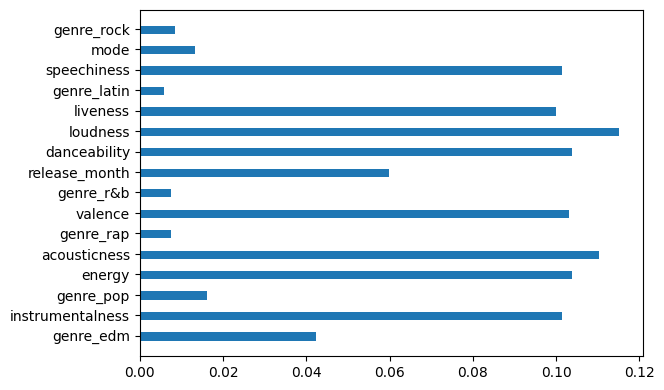

<Figure size 500x500 with 0 Axes>

In [ ]:
col = sorted_correlations[2:18].index
#modelname.feature_importance_
y = rf.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width)
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)

plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=136f3a8a-0a9b-47e2-bc83-6e12c74af5a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>